In [1]:
import numpy as np
import matplotlib.pyplot as plt

<p>La portada del proyecto se encuentra la siguiente <a href="portada.pdf">referencia</a>, y en este aparto se explica en resumidas cuentas lo que se hace durante el proyecto, principalmente las respuestas de las preguntas</p>



### 1. Encuentra una matriz A tal que Xn+1 = AXn

La matriz A que describen los sistemas de educaciones son:

In [2]:
A = np.array([
    [0, 0, 0, 0, 127, 4, 80],
    [0.6747, 0.7370, 0, 0, 0, 0, 0],
    [0, 0.0486, 0.6610, 0, 0, 0, 0],
    [0, 0, 0.0147, 0.6907, 0, 0, 0],
    [0, 0, 0, 0.0518, 0, 0, 0],
    [0, 0, 0, 0, 0.8091, 0, 0],
    [0, 0, 0, 0, 0, 0.8091, 0.8089]
])

### 2. Supongamos que una poblacion de 20 remigrantes llego a una isla aislada, en la cual no habian torturgas Bobas anteriormente. Grafique el numero de tortugas (tanto en cada etapa de desarrollo como el total) que habrian en dicha isla, desde n = 0 a n = 100. Describa lo que ocurre con la poblacion a traves del tiempo, indique el significado fısico del valor propio λ1 y su relacion con este crecimiento.

Primero creamos el vector condicion inicial, y a su vez implementamos la funcion `population_year`, que toma la matriz A de las condinciones del sistema, el vector X0 que es el vector inicial y n que representa el numero de años que se quiere calcular.

In [3]:
X0 = np.array([0, 0, 0, 0, 0, 20, 0]) # Vector con las condiciones iniciales

def population_year(A, X0, n):
    return np.linalg.matrix_power(A, n) @ X0

poblation = np.array([population_year(A, X0, i) for i in range(0, 101)])

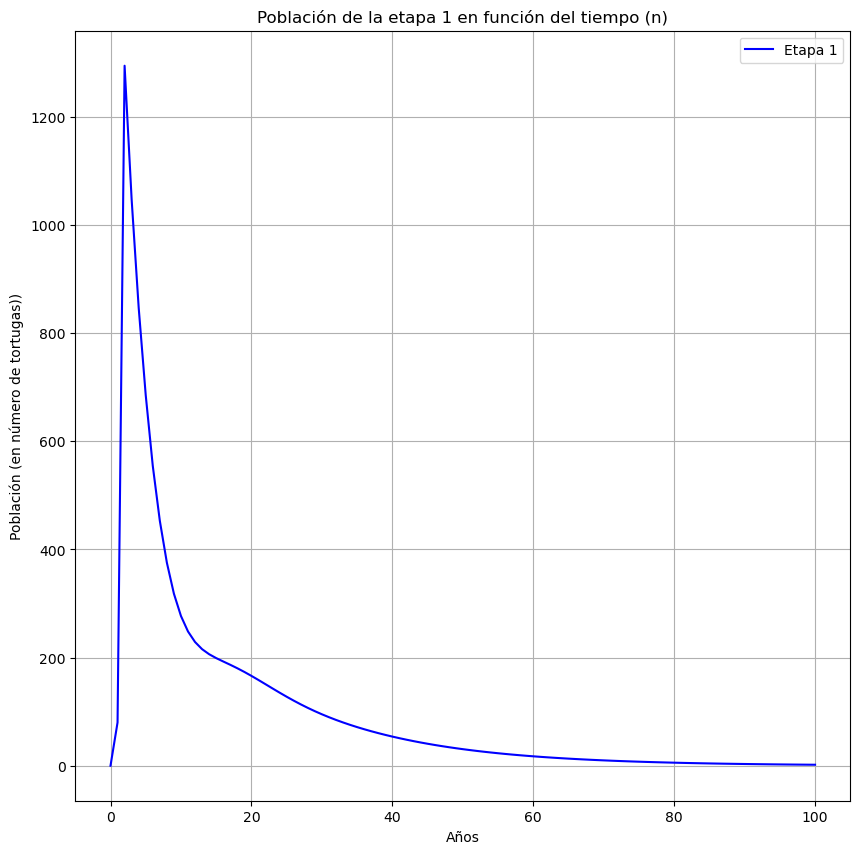

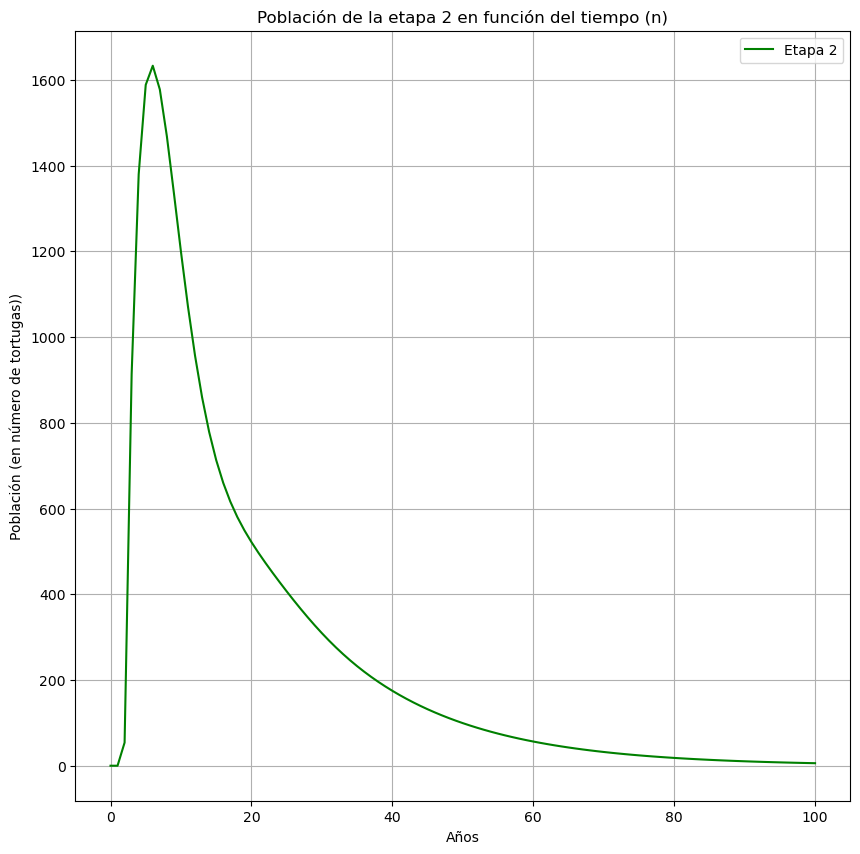

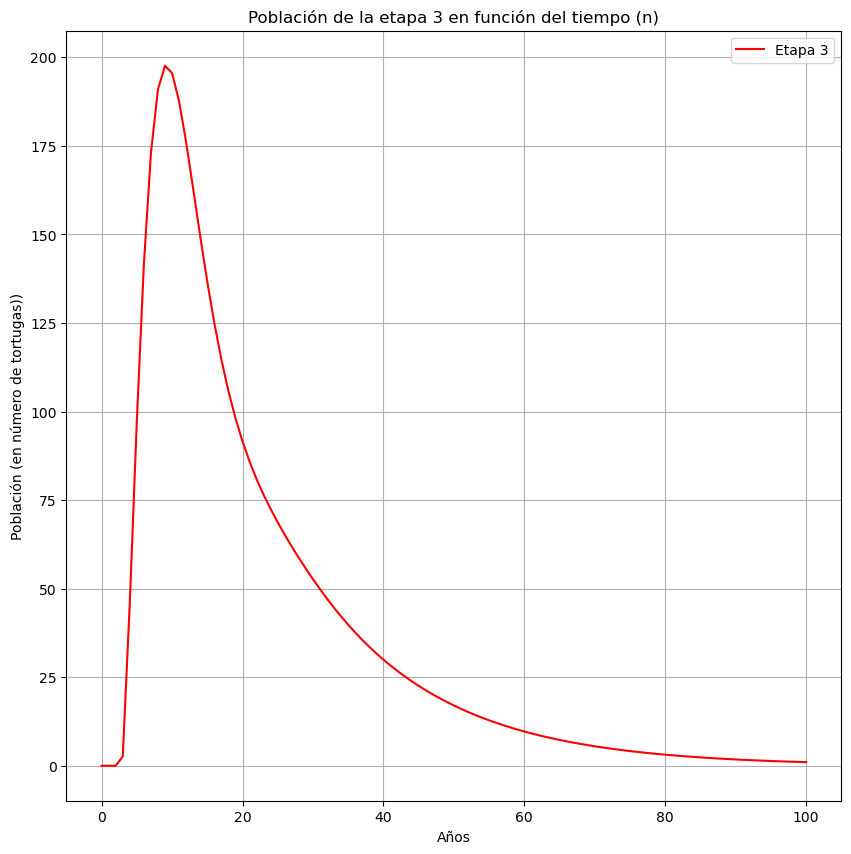

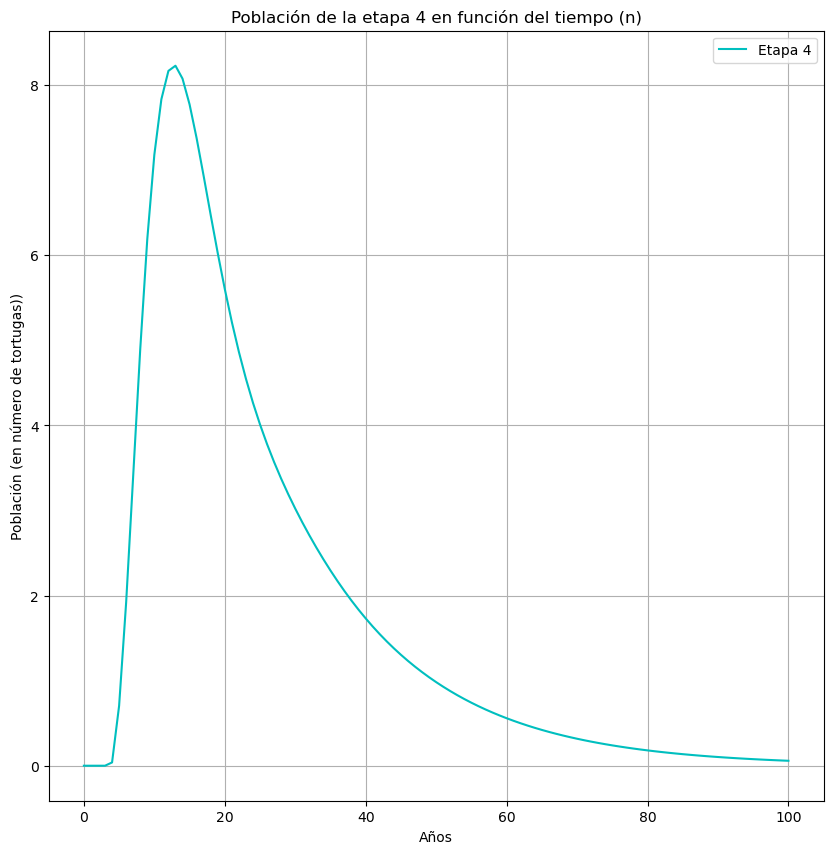

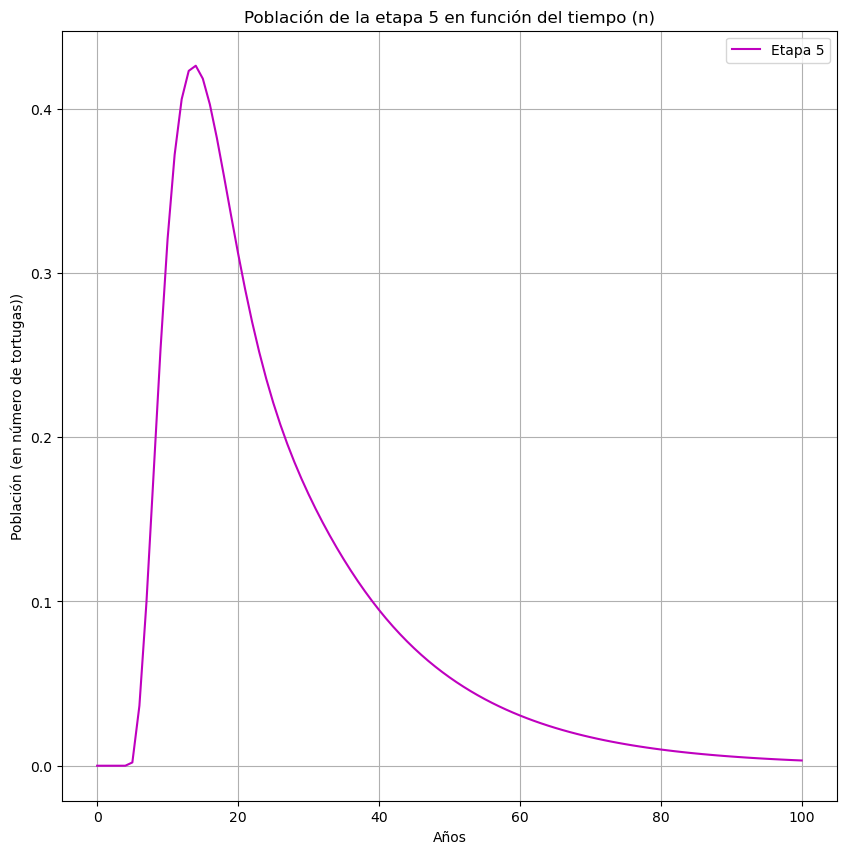

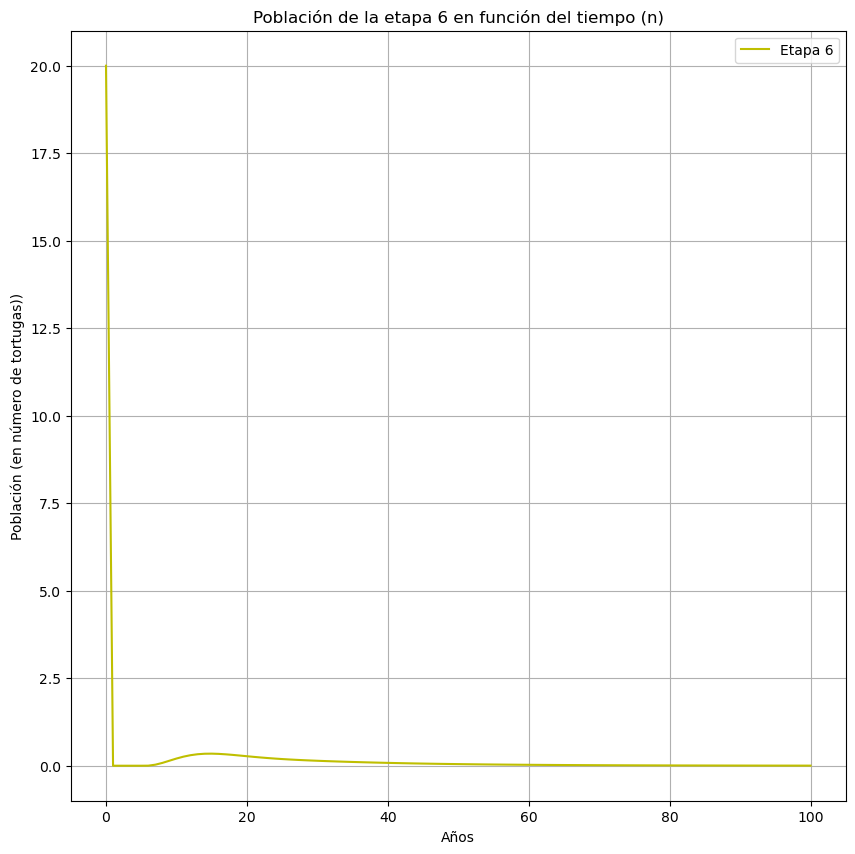

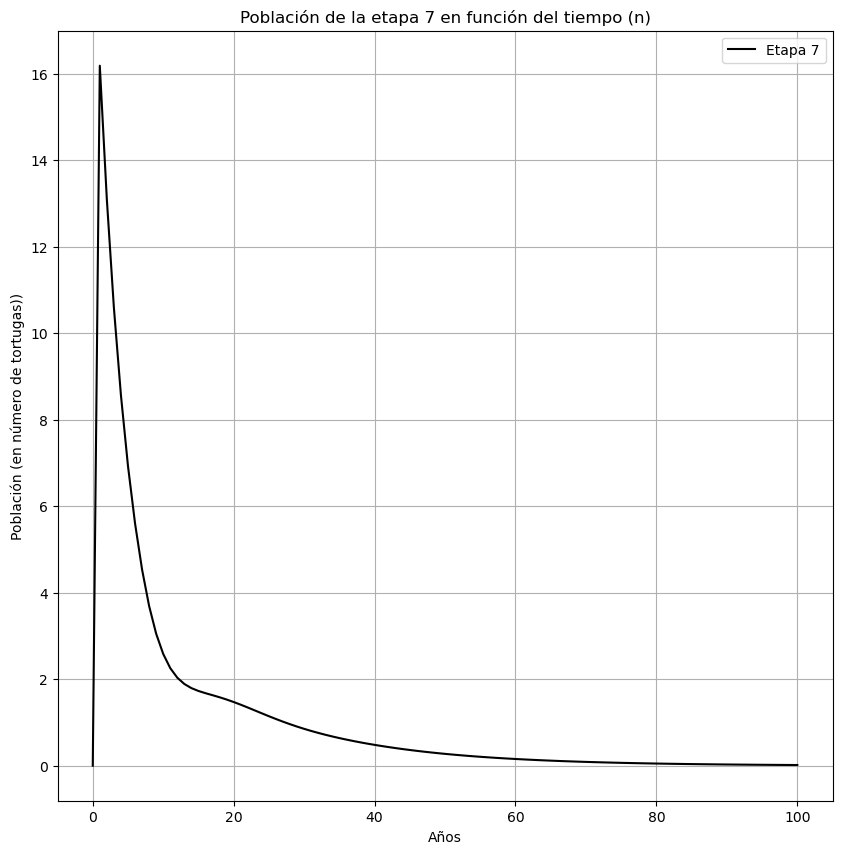

In [4]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Grafico de las poblaciones de tortura por etapa en funcion del tiempo `n`

for i in range(7):
    plt.figure(figsize=(10, 10), dpi=100)
    plt.plot(range(101), poblation[:, i], label=f'Etapa {i+1}', color=colors[i])
    plt.legend()
    plt.xlabel('Años')
    plt.ylabel('Población (en número de tortugas))')
    plt.title(f'Población de la etapa {i+1} en función del tiempo (n)')
    plt.grid()
    plt.show()


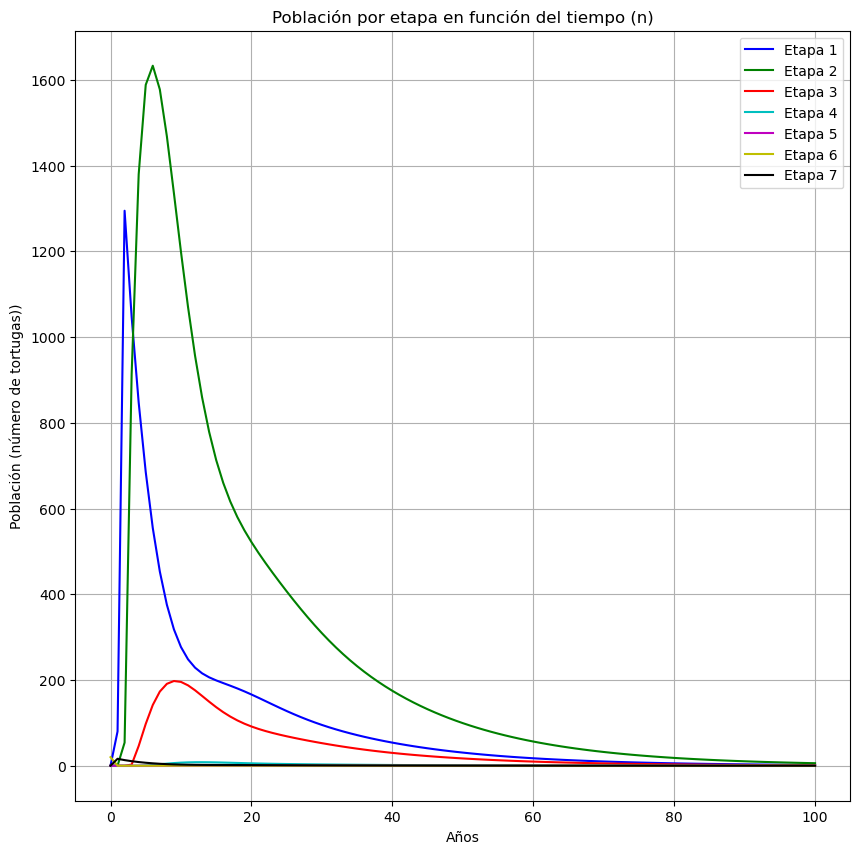

In [5]:
plt.figure(figsize=(10, 10), dpi=100)
plt.title("Poblaciones de tortugas por etapa en función del tiempo (n)")

for i in range(7):
    plt.plot(range(101), poblation[:, i], label=f'Etapa {i+1}', color=colors[i])

plt.legend()
plt.xlabel('Años')
plt.ylabel('Población (número de tortugas))')
plt.title(f'Población por etapa en función del tiempo (n)')
plt.grid()


In [6]:
# Grafico de la poblacion total en funcion del tiempo `n`
poblacion_year = [np.sum(i) for i in poblation]

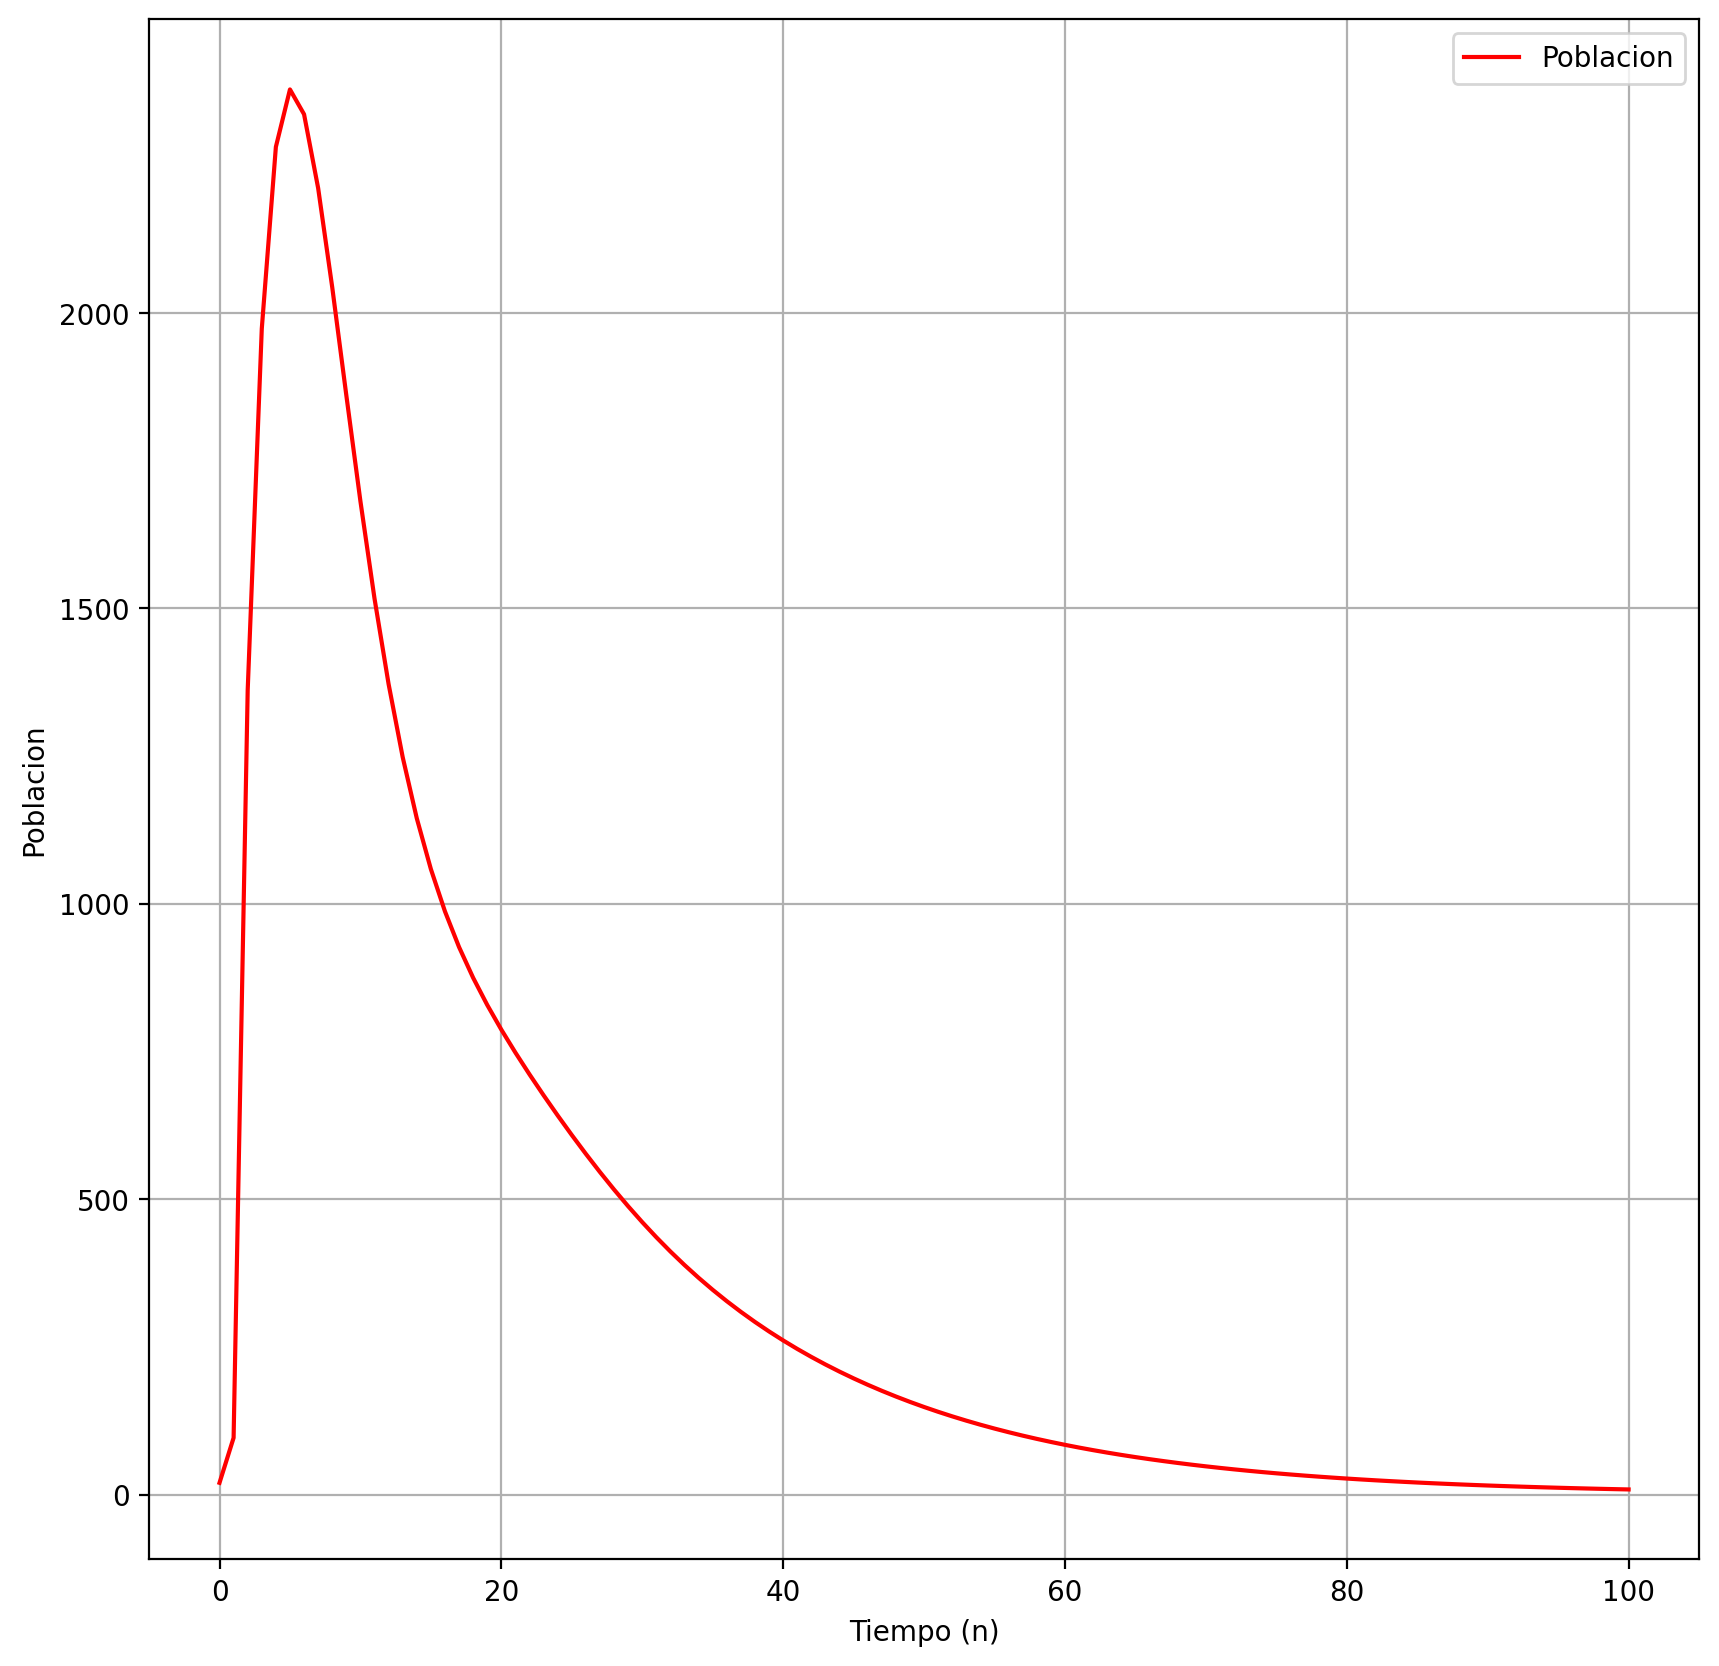

In [7]:
plt.figure(figsize=(10, 10), dpi=200)
plt.plot(range(101), poblacion_year, color="red", label="Poblacion")
plt.legend()

plt.xlabel("Tiempo (n)")
plt.ylabel("Poblacion")
plt.grid()


En un principio podemos notar que existe un gran aumento de la poblacion de las tortugas, principalmente las que estan en la etapa 1 y 2, debido que las tortugas inciales ponen una gran cantidad de huevos en un principio, pero a su vez estas van reduciendo su poblacion en un 20% con el pasar del tiempo (n). Aunque notemos que un que al pasar el tiempo, las tortugas que eran jovenes pasan a dejar descendencia, por lo que la poblacion de tortugas en la etapa 1, 2 y 3 van dismuyendo, y cada vez las torutugas van envejeciendo y dejando una menor cantidad de descendencia. A la final, pasado n=100 la poblacion de las tortugas tiende a 0 o en este contexto se extinguen.





In [8]:
# Viendo el primer valor propio

eigenvalues = np.linalg.eigvals(A)
round(eigenvalues[0], 5)

/tmp/ipykernel_3822/1126710878.py:4: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  round(eigenvalues[0], 5)


(-0.08845+0.1196j)

In [9]:
print(f"El valor propio dominante es: {(vp_dom := max(abs(eigenvalues)))} con λ_{np.where(eigenvalues == vp_dom)[0][0] + 1}.")


El valor propio dominante es: 0.9450309806910039 con λ_7.


Notemos que $λ_1$ no es el valor propio dominante de la matriz A, ya que este puesto lo ocupa $λ_7$ al poseer una mayor magnitud. Por lo tanto, en respuesta a la pregunta, $λ_1$ no tiene una gran relevancia en términos de crecimiento de la población de tortugas, ya que el valor propio dominante $λ_7$ tiene un impacto más significativo en la dinámica a largo plazo de la población. Ademas cabe mencionar que $λ_7$ es real y menor a 1, por lo que su impacto nos dira que la poblacion tendera a 0 (cuando n -> $\infty$). 



### 3.Calcula, para distintas poblaciones iniciales, el porcentaje de tortugas en cada una de las etapas de desarrollo en relación a la población total, desde n=25 hasta n=100. Grafica los resultados. ¿Cómo influye la distribución de la población inicial en la distribución de la población en el futuro? ¿Qué elemento relacionado a la matriz A determina esta distribución? Describe lo que observas






Vamos a realizar el proceso de elegir 20 vectores de condiciones inciales completamente alzar usando `np.random.randint`, para ver si el procentaje de tortugas por etapa son similares o dependen de algun elemento de la matriz A.

In [10]:
X0_random = lambda : np.random.randint(0, 1900, (7, 1)) # Vector con las condiciones iniciales

Incluso dentro de los elementos alzar incluimos un rango amplio de numeros, para ver si el porcentaje de tortugas por etapa son similares o dependen de algun elemento de la matriz A.

In [11]:
poblation = dict()
sum_poblation = dict()
por_poblation = dict()

En el siguiente apartado calculamos en un principio el vector inicial aleatorio, donde calculamos las distrubuciones de las tortuga por etapa entre n = 25 hasta n = 100, y luego calculamos el total de poblacion por año. Con el fin de calcular los porcentajes por etapa y por año.




In [12]:
for i in range(20):
    poblation[i] = np.array([population_year(A, X0_random(), i) for i in range(25, 101)])
    sum_poblation[i] = np.array([np.sum(poblation[i][n]) for n in range(0, 76)])

for n in range(20):
    por_poblation[n] = np.array([poblation[n][i]/sum_poblation[n][i] for i in range(76)])

# Aplanar la lista de lista
for key in por_poblation.keys():
    list_temp = []
    for value in por_poblation[key]:
        list_temp.append([i for i in [value[i][0] for i in range(7)]])
    por_poblation[key] = np.array(list_temp)


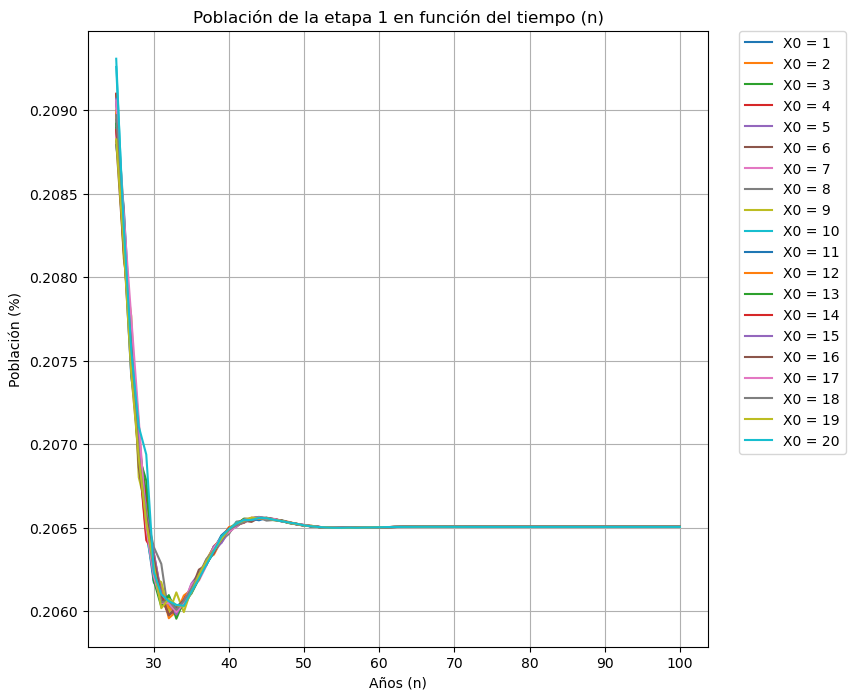

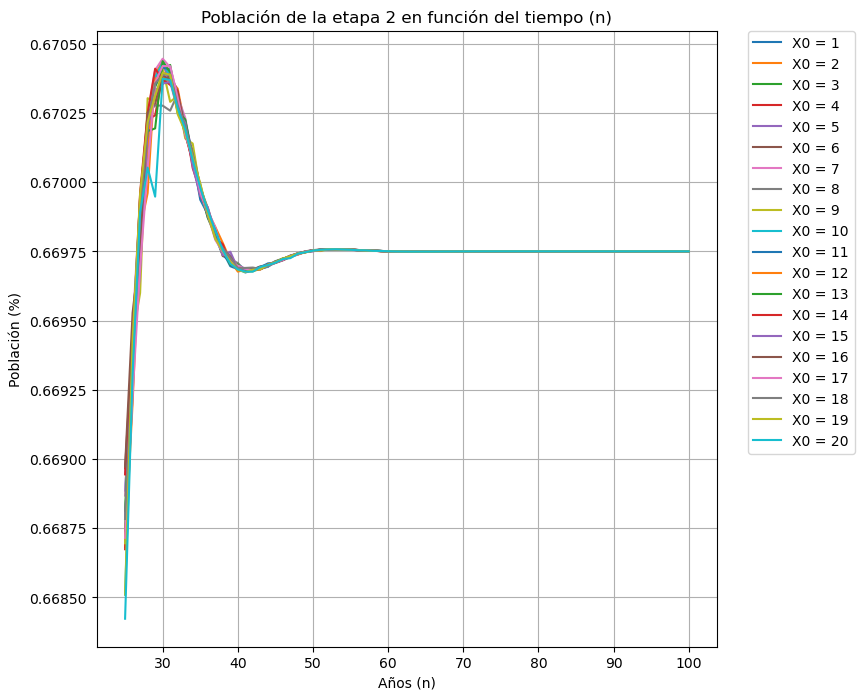

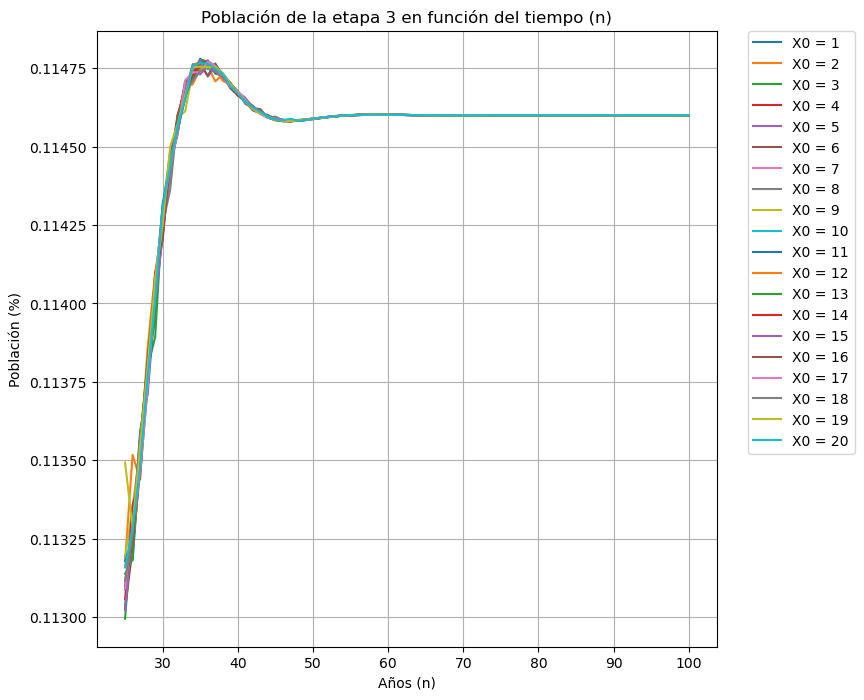

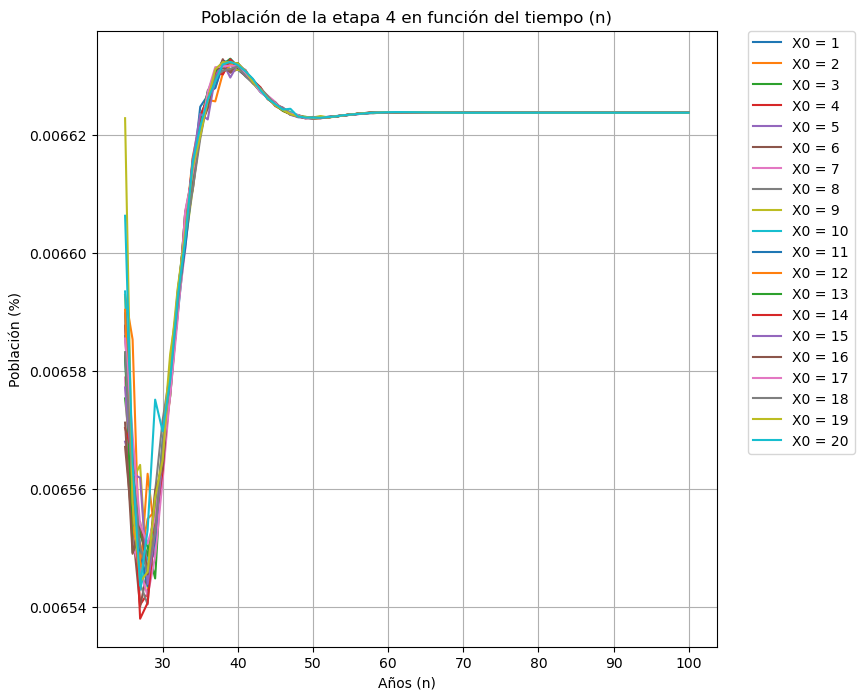

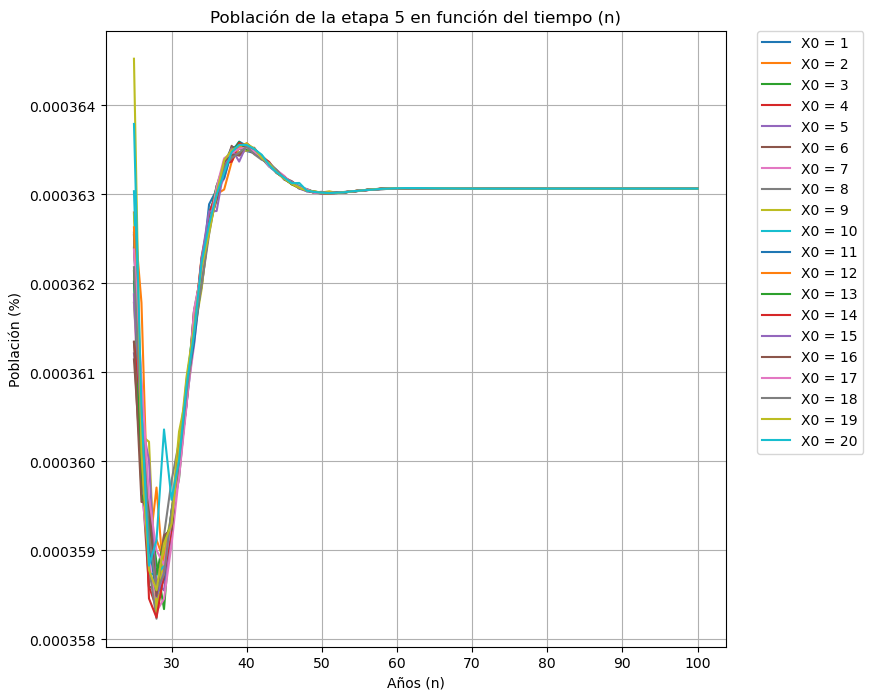

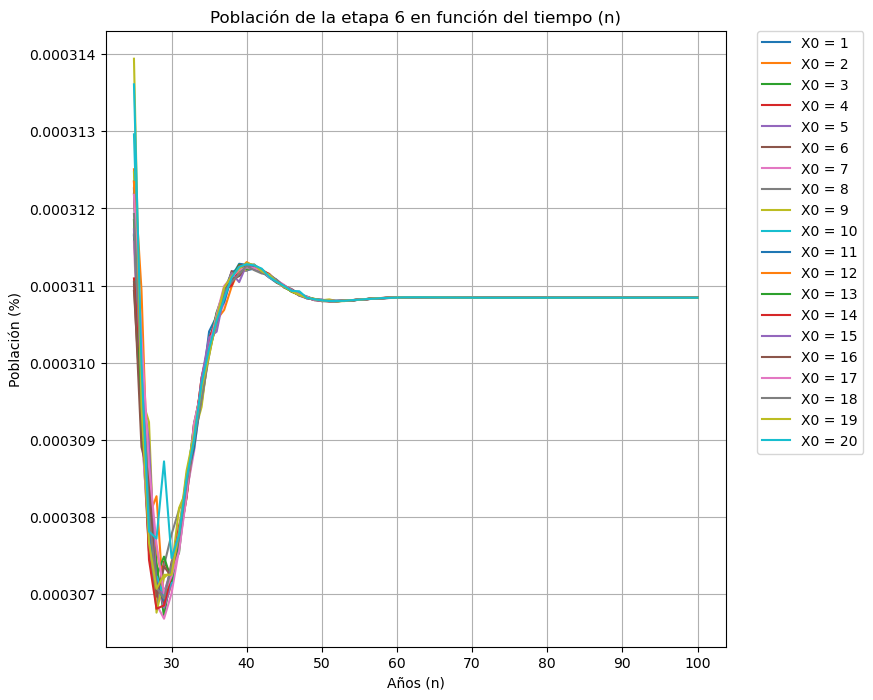

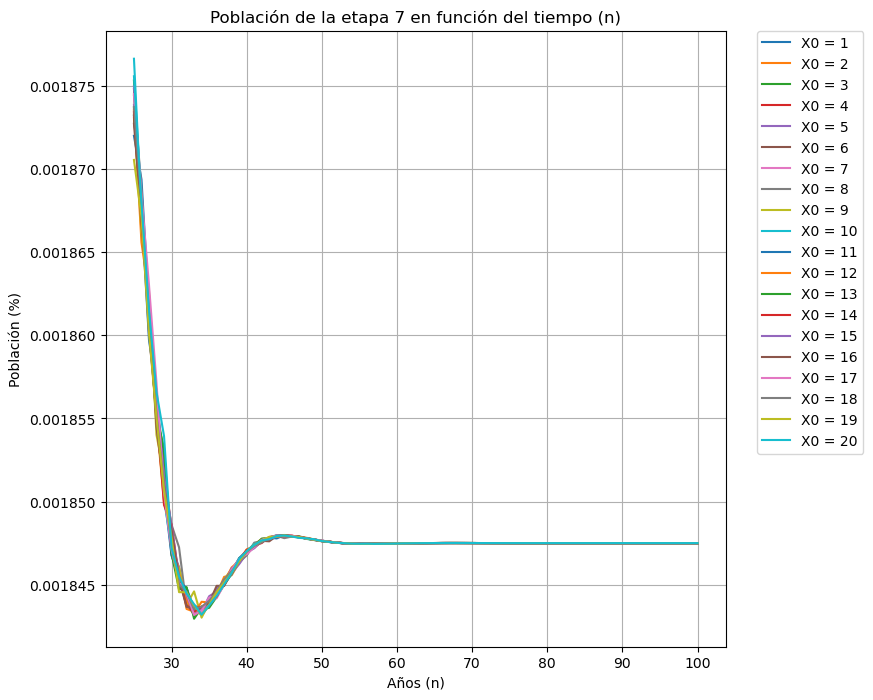

In [13]:

for i in range(7):
    plt.figure(figsize=(8, 8), dpi=100)

    for num in range(20):  # Change the range to match the number of colors
        plt.plot(range(25, 101), por_poblation[num][:, i], label=f"X0 = {num+1}")

   
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("Años (n)")
    plt.ylabel("Población (%)")
    plt.title(f"Población de la etapa {i+1} en función del tiempo (n)")
    plt.grid()

A la final

In [14]:
np.sum(por_poblation[0][75])

1.0

**Nota X0 hace referencia al vector de condiciones iniciales, y n hace referencia al numero de años que se quiere calcular.**

Hacemos el grafico por etapa, para 20 vectores inciales distintos y podemos observar ciertas fluctuaciones, pero se mantienen cerca de rangos similares a los otros vectores iniciales. A primera vista notemos que apesar de que los vectores iniciales sean muy distintos entre si (son aleatorios en un rango amplio), podemos notar que mantienen patrones de comportamiento similares, por lo que podemos decir que la distribucion de la poblacion inicial no influye en la distribucion de la poblacion en el futuro. 

No es extrañar que esto sea de esa forma, ya que el comportamiento de la poblacion de las tortugas es determinado por la matriz A, y en especifico por el valor propio dominante $λ_7$ que es el que determina el comportamiento de la poblacion de las tortugas a largo plazo. Por lo que podemos decir que el elemento relacionado a la matriz A que determina esta distribucion es el valor propio dominante $λ_7$, los otros valores no influyen de forma significativa en el comportamiento de la poblacion de las tortugas al largo plazo.